In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
UCDP_Figures = pd.read_csv(r"C:\Users\Tom\Documents\Myanmar_Project\Data _&_Codebooks\GEDEvent_v22_1.csv", 
                           low_memory = False)

In [3]:
UCDP_Figures.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


In [4]:
UCDP_Figures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [5]:
pd.to_datetime(UCDP_Figures["date_end"], dayfirst=True).head()

0   2017-07-31
1   2021-08-26
2   2021-08-28
3   2021-08-29
4   1989-01-13
Name: date_end, dtype: datetime64[ns]

In [6]:
# this changes specific columns from strings to datetime values
UCDP_Figures["date_start"] = pd.to_datetime(UCDP_Figures["date_start"], dayfirst=True)
UCDP_Figures["date_end"] = pd.to_datetime(UCDP_Figures["date_end"], dayfirst=True)

# this sorts the values in date_end into chronological order, which will be necessary for plotting values to graphs later on
UCDP_Figures.sort_values(by='date_end', inplace = True)

In [7]:
UCDP_Figures.dtypes

id                            int64
relid                        object
year                          int64
active_year                   int64
code_status                  object
type_of_violence              int64
conflict_dset_id              int64
conflict_new_id               int64
conflict_name                object
dyad_dset_id                  int64
dyad_new_id                   int64
dyad_name                    object
side_a_dset_id                int64
side_a_new_id                 int64
side_a                       object
side_b_dset_id                int64
side_b_new_id                 int64
side_b                       object
number_of_sources             int64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                    int64
where_coordinates            object
where_description            object
adm_1                       

In [8]:
UCDP_Figures["conflict_name"].value_counts()

Syria: Government                                                   64815
Afghanistan: Government                                             37548
India: Kashmir                                                       6541
Syria: Islamic State                                                 6177
Iraq: Government                                                     6134
                                                                    ...  
ARLA, FIAA, FPLA - MPA                                                  1
Oromo - Gamo, Guraghe                                                   1
Ndoki - Ogoni                                                           1
Sabaneta - Pavilion I gang - Sabaneta - Re-education sector gang        1
Majerteen subclan (Darod) - Ogaden clan (Darod)                         1
Name: conflict_name, Length: 1351, dtype: int64

In [9]:
UCDP_Figures["conflict_name"].unique()

array(['India: Punjab/Khalistan', 'Amal - Hezbollah',
       'Afghanistan: Government', ..., 'Los Choneros - Los Lobos',
       'IS - Banibangou Vigilance Committee', 'Misseriya - Arab'],
      dtype=object)

In [10]:
# If necessary all unique names of conflicts could be printed with the following code;
#for x in UCDP_Figures["conflict_name"].unique(): 
#    print(x)

Below we can see the unique Conflict Names that relate to Myanmar in this dataset.
The value_counts() function is counting each individual row relating to any conflict which includes the term "Myanmar", and each of these rows represents an individual event recorded by UCDP. 

Without even looking at fatalities, we can see that most violence that has been recorded, is overwhelmingly inflicted upon civilians.

In [11]:
UCDP_Myanmar = UCDP_Figures[UCDP_Figures["conflict_name"].str.contains("Myanmar")]
UCDP_Myanmar["conflict_name"].value_counts()

Government of Myanmar (Burma) - Civilians    1654
Myanmar (Burma): Government                   511
Myanmar (Burma): Karen                        419
Myanmar (Burma): Kachin                       305
Myanmar (Burma): Arakan                       219
Myanmar (Burma): Shan                         203
Myanmar (Burma): Karenni                      112
Myanmar (Burma): Kokang                        95
Buddhists (Myanmar) - Muslims (Myanmar)        25
Myanmar (Burma): Nagaland                      19
Myanmar (Burma): Mon                           12
Myanmar (Burma): Wa                            10
Name: conflict_name, dtype: int64

For the analysis I'll use the "best" column for death figures, UCDP claims this is the most accurate number of death figures.

In [12]:
# this code checks the "best" column and returns True for rows with null values, and then prints True if there are 
# any null values at all

print(pd.isnull(UCDP_Myanmar["best"]).any())

# this code checks for 0 values (events with 0 deaths) as they won't be needed
a = 0
for x in UCDP_Myanmar["best"]:
    if x == 0:
        a += 1

print(a)

False
425


In [13]:
# this code drops the 0 values from UCDP_Myanmar
UCDP_Myanmar = UCDP_Myanmar.loc[UCDP_Myanmar["best"] != 0]

Text(0, 0.5, 'Deaths')

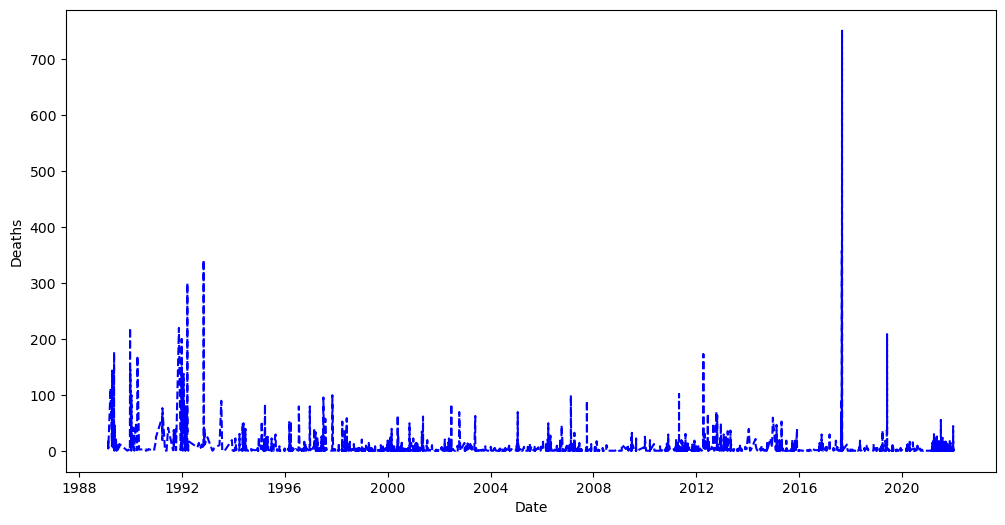

In [14]:
fig, axes = plt.subplots(figsize=(12, 6))

x = UCDP_Myanmar["date_end"]
y = UCDP_Myanmar["best"]

axes.plot(x, y, 'b--', label='Total Deaths')

axes.set_xlabel("Date")
axes.set_ylabel("Deaths")

In [15]:
UCDP_Myanmar.dtypes

id                            int64
relid                        object
year                          int64
active_year                   int64
code_status                  object
type_of_violence              int64
conflict_dset_id              int64
conflict_new_id               int64
conflict_name                object
dyad_dset_id                  int64
dyad_new_id                   int64
dyad_name                    object
side_a_dset_id                int64
side_a_new_id                 int64
side_a                       object
side_b_dset_id                int64
side_b_new_id                 int64
side_b                       object
number_of_sources             int64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                    int64
where_coordinates            object
where_description            object
adm_1                       

In [16]:
UCDP_Myanmar = UCDP_Myanmar.set_index("date_end")

UCDP_Myanmar


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_start,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
date_end,,,,,,,,,,,,,,,,,,,,,
1989-02-21,49343,MYA-1989-1-304-1,1989,1,Clear,1,231,231,Myanmar (Burma): Kachin,461,...,1989-02-21,0,0,0,5,5,5,5,775,NaN
1989-02-21,49166,MYA-1989-1-306-1,1989,1,Clear,1,221,221,Myanmar (Burma): Karen,428,...,1989-02-17,16,0,4,0,20,20,20,775,NaN
1989-02-22,50009,MYA-1989-1-306-2,1989,1,Clear,1,221,221,Myanmar (Burma): Karen,428,...,1989-02-22,0,0,5,0,5,5,5,775,NaN
1989-03-04,49542,MYA-1989-1-304-2,1989,1,Clear,1,231,231,Myanmar (Burma): Kachin,461,...,1989-03-04,36,0,0,0,36,36,36,775,NaN
1989-03-26,49974,MYA-1989-1-306-3,1989,1,Clear,1,221,221,Myanmar (Burma): Karen,428,...,1989-03-23,38,0,0,74,112,112,112,775,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,426979,MYA-2021-3-955-234,2021,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,144,...,2021-12-31,0,0,1,0,1,1,1,775,NaN
2021-12-31,426715,MYA-2021-1-16759-407,2021,1,Clear,1,222,222,Myanmar (Burma): Government,16759,...,2021-12-31,0,0,0,1,1,12,0,775,NaN
2021-12-31,426708,MYA-2021-1-16759-406,2021,1,Clear,1,222,222,Myanmar (Burma): Government,16759,...,2021-12-31,0,0,0,1,1,4,0,775,NaN


In [17]:
UCDP_MyanmarRefined = UCDP_Myanmar["2010-01-01":"2022-12-31"]

UCDP_MyanmarRefined = UCDP_MyanmarRefined.reset_index()

UCDP_MyanmarRefined

,date_end,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,...,date_start,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,2010-01-17,49033,MYA-2010-3-775-1,2010,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2010-01-17,0,0,1,0,1,1,1,775,NaN
1,2010-01-19,49931,MYA-2010-3-775-4,2010,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2010-01-19,0,0,1,0,1,1,1,775,NaN
2,2010-01-19,49930,MYA-2010-3-775-5,2010,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2010-01-19,0,0,1,0,1,1,1,775,NaN
3,2010-01-19,49028,MYA-2010-3-775-3,2010,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2010-01-19,0,0,1,0,1,1,1,775,NaN
4,2010-02-06,51262,MYA-2010-3-775-6,2010,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2010-02-06,0,0,1,0,1,1,1,775,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2021-12-31,426979,MYA-2021-3-955-234,2021,1,Clear,3,144,488,Government of Myanmar (Burma) - Civilians,...,2021-12-31,0,0,1,0,1,1,1,775,NaN
1508,2021-12-31,426715,MYA-2021-1-16759-407,2021,1,Clear,1,222,222,Myanmar (Burma): Government,...,2021-12-31,0,0,0,1,1,12,0,775,NaN
1509,2021-12-31,426708,MYA-2021-1-16759-406,2021,1,Clear,1,222,222,Myanmar (Burma): Government,...,2021-12-31,0,0,0,1,1,4,0,775,NaN
1510,2021-12-31,426709,MYA-2021-1-511-45,2021,1,Clear,1,253,253,Myanmar (Burma): Karenni,...,2021-12-31,0,2,0,1,3,32,2,775,NaN


Text(0, 0.5, 'Deaths')

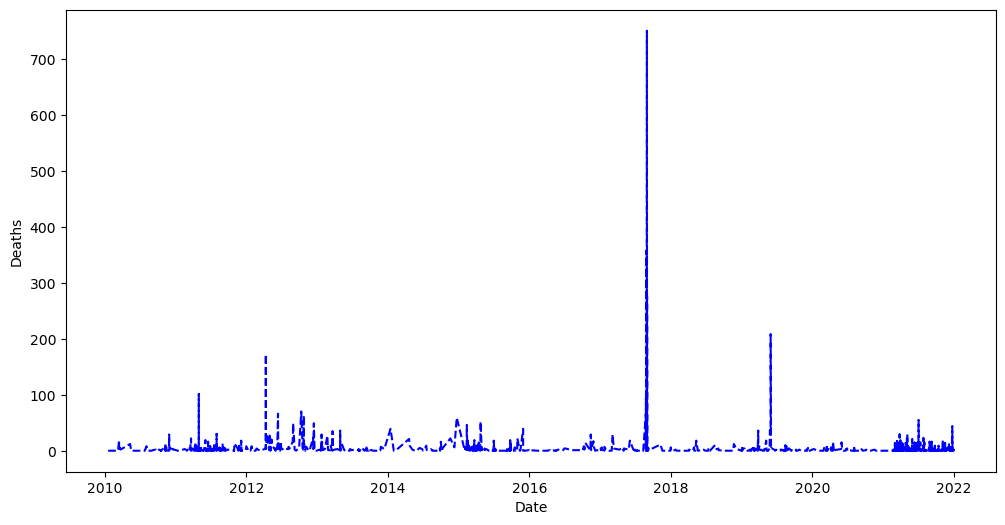

In [18]:
fig, axes = plt.subplots(figsize=(12, 6))

x = UCDP_MyanmarRefined["date_end"]
y = UCDP_MyanmarRefined["best"]

axes.plot(x, y, 'b--', label='Total Deaths')

axes.set_xlabel("Date")
axes.set_ylabel("Deaths")

In [24]:
# reset index so "date_end" can be used for bokeh
UCDP_Myanmar = UCDP_Myanmar.reset_index()

In [25]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [26]:
output_notebook()

Loading BokehJS ...

In [27]:
p1 = figure(x_axis_type="datetime", title="Recorded Deaths", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Deaths"

p1.line(UCDP_Myanmar.index, UCDP_Myanmar["date_end"], color='#f2a900', legend='Number of Deaths')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)